In [1]:
from keras.applications.densenet import DenseNet121
dn121 = DenseNet121(
    weights='imagenet', 
    include_top=False, 
    input_shape=(250, 250, 3))

29089792/29084464 [==============================] - 1s 0us/step


In [2]:
def build_model(base, layer_units, num_classes):
    for layer in base.layers:
        layer.trainable = False
    
    x = base.output
    x = Flatten()(x)
    for num_units in layer_units:
        x = Dense(num_units, activation='relu')(x)
    predictions = Dense(num_classes, activation='sigmoid')(x)
    model = Model(inputs=base.input, outputs=predictions)
    return model

In [3]:
from keras.optimizers import Adam, SGD
from keras.layers import Activation, Dense, Flatten
from keras.models import Model, load_model

adam = Adam(lr=0.0001)
model = build_model(dn121, [1024], 1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 250, 250, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_20 (ZeroPadding2 (None, 256, 256, 3)  0           input_11[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 125, 125, 64) 9408        zero_padding2d_20[0][0]          
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 125, 125, 64) 256         conv1/conv[0][0]                 
_______________________________________________________________________________________

In [4]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy',  metrics = ['accuracy'])

In [6]:

train_generator = train_datagen.flow_from_directory('/content/drive/My Drive/Train', batch_size = 16, class_mode='binary', target_size=(250,250))

Found 4745 images belonging to 2 classes.


In [7]:
validation_generator = test_datagen.flow_from_directory('/content/drive/My Drive/Valid', batch_size = 16, class_mode='binary', target_size=(250,250))

Found 1582 images belonging to 2 classes.


In [8]:
history= model.fit_generator(train_generator,
                             validation_data = validation_generator,
                             steps_per_epoch=296,
                             validation_steps=98,
                             epochs = 10,   
                             verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
296/296 [==============================] - 5066s 17s/step - loss: 0.5109 - accuracy: 0.7995 - val_loss: 0.3352 - val_accuracy: 0.8616
Epoch 2/10
296/296 [==============================] - 1091s 4s/step - loss: 0.3208 - accuracy: 0.8704 - val_loss: 0.3088 - val_accuracy: 0.8731
Epoch 3/10
296/296 [==============================] - 1082s 4s/step - loss: 0.2789 - accuracy: 0.8873 - val_loss: 0.3063 - val_accuracy: 0.8801
Epoch 4/10
296/296 [==============================] - 1074s 4s/step - loss: 0.2354 - accuracy: 0.9067 - val_loss: 0.2778 - val_accuracy: 0.8871
Epoch 5/10
296/296 [==============================] - 1076s 4s/step - loss: 0.2056 - accuracy: 0.9193 - val_loss: 0.2402 - val_accuracy: 0.9011
Epoch 6/10
296/296 [==============================] - 1085s 4s/step - loss: 0.2006 - accuracy: 0.9196 - val_loss: 0.2435 - val_accuracy: 0.8992
Epoch 7/10
296/296 [==============================] - 1079s

In [9]:
model.save('/content/drive/My Drive/Models/DenseNet121Final.h5')

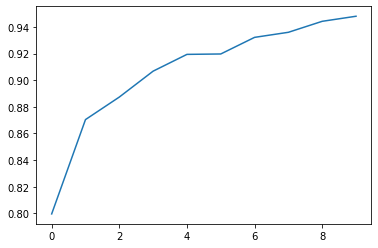

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.show()

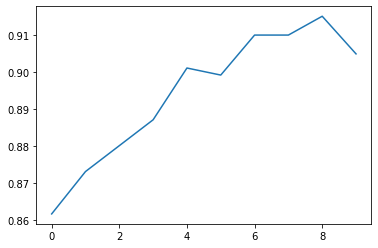

In [11]:
plt.plot(history.history['val_accuracy'])
plt.show()

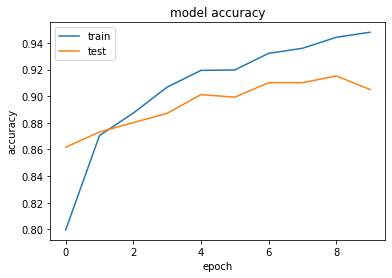

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

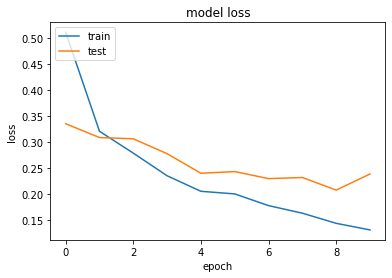

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [14]:
test_generator = test_datagen.flow_from_directory('/content/drive/My Drive/Test', batch_size = 16, class_mode='binary', target_size=(250,250))

Found 1582 images belonging to 2 classes.


In [15]:
scores = model.evaluate(test_generator)

99/99 [==============================] - 1223s 12s/step - loss: 0.2610 - accuracy: 0.8982


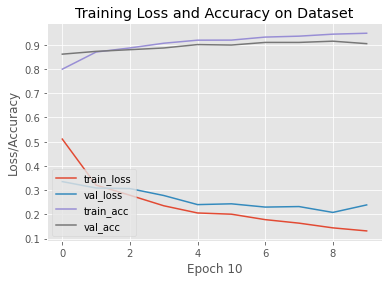

In [16]:
import numpy as np
N=10
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch 10")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")


In [17]:
predIdxs = model.predict(x=test_generator, steps=(98) + 1)

In [18]:
predIdxs = np.argmax(predIdxs, axis=1)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_generator.classes, predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

In [23]:
sensitivity

0.68

In [24]:
specificity

0.58